# Session 0b - Inmas Workshop Machine Learning Workshop, January 13-14, 2024
## Preparation Notebook

## Scikit-learn, Recap of Linear Regression & Visualization

In the following exercise, we recap some knowledge from the Inmas Workshop on Statistical Methods of November 3-5 to prepare for the what we want to cover in this weekend's workshop.

### Scikit-Learn

During the workshop weekend, we will work a lot with [scikit-learn](https://scikit-learn.org/stable/), an open-source Python library that makes many standard machine learning models and methods readily accessible. 

As outlined [here](https://scikit-learn.org/stable/testimonials/testimonials.html#), scikit-learn is a toolkit popular among industry companies as well.

In [42]:
## This code tries to import scikit-learn (package name sklearn), and install it via conda if not yet installed.
try: 
    import sklearn
    print(f"Version of sklearn: {sklearn.__version__}")
except ModuleNotFoundError:
    !conda install --yes scikit-learn==1.3.2
    import sklearn
    print(f"Version of sklearn: {sklearn.__version__}")

Version of sklearn: 1.3.2


### Revisit Linear Regression using scikit-learn

In November, we familiarized ourselves with linear regression models. We used the `statsmodels` [library](https://www.statsmodels.org/stable/index.html) to work with linear regression models.

Recall that you used the [evals](https://www.openintro.org/data/index.php?data=evals) dataset containing student evaluations of courses and ratings of students' physical appearance ratings.

The respective notebooks that were used are linked below: 

[3a_MultipleLinearRegression.ipynb](https://github.com/INMAS-Math/Workshop-02/blob/main/3a_MultipleLinearRegression.ipynb)

[3b_MultipleRegressionSupplement.ipynb](https://github.com/INMAS-Math/Workshop-02/blob/main/3b_MultipleRegressionSupplement.ipynb)

We load the dataset `evals` below.

In [ ]:
import pandas as pd
import numpy as np
import statsmodels 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib
import matplotlib.pyplot as plt

We recall that previously, we fitted a linear regression model to the dataset `evals` using the end of semester average student evaluation score `score` as a response variable, and the average beautiy rating of a professor among students `bty_avg` and the professor age `age`  as predictor variables.

Mathematically, this means that we compute the 'best' (in $
\ell_2$-sense) coefficients $\beta_0,\ldots,\beta_p$ in the model
$$
\begin{align}
y_i &= \beta_0 + X_{i,1}\beta_1 + \cdots + X_{i,p}\beta_{p}
\end{align}
$$
where $y_i$ corresponds to the salary of the $i$-th data sample, and the $X_{i,j}$ corresponds to the $j$-th predictor variable of the $i$-th data sample -- in this case for $p=2$.


We recall the code we used below.

In [22]:
import pandas as pd
import numpy as np
import statsmodels 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib
import matplotlib.pyplot as plt

data = pd.read_csv("https://raw.githubusercontent.com/akmand/datasets/master/openintro/evals.csv")
display(data)

,score,rank,ethnicity,gender,language,age,cls_perc_eval,cls_did_eval,cls_students,cls_level,...,cls_credits,bty_f1lower,bty_f1upper,bty_f2upper,bty_m1lower,bty_m1upper,bty_m2upper,bty_avg,pic_outfit,pic_color
0,4.7,tenure track,minority,female,english,36,55.81395,24,43,upper,...,multi credit,5,7,6,2,4,6,5.000,not formal,color
1,4.1,tenure track,minority,female,english,36,68.80000,86,125,upper,...,multi credit,5,7,6,2,4,6,5.000,not formal,color
2,3.9,tenure track,minority,female,english,36,60.80000,76,125,upper,...,multi credit,5,7,6,2,4,6,5.000,not formal,color
3,4.8,tenure track,minority,female,english,36,62.60163,77,123,upper,...,multi credit,5,7,6,2,4,6,5.000,not formal,color
4,4.6,tenured,not minority,male,english,59,85.00000,17,20,upper,...,multi credit,4,4,2,2,3,3,3.000,not formal,color
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,4.5,tenure track,not minority,male,english,32,60.46511,52,86,upper,...,multi credit,6,6,9,7,8,5,6.833,not formal,color
459,3.5,tenure track,minority,female,non-english,42,57.14286,48,84,upper,...,multi credit,3,8,7,4,6,4,5.333,not formal,color
460,4.4,tenure track,minority,female,non-english,42,77.61194,52,67,upper,...,multi credit,3,8,7,4,6,4,5.333,not formal,color
461,4.4,tenure track,minority,female,non-english,42,81.81818,54,66,upper,...,multi credit,3,8,7,4,6,4,5.333,not formal,color


The following code executed the linear regression and printed the results:

In [24]:
model_formulation = smf.ols("score ~ bty_avg + age", data = data)
results = model_formulation.fit()
model_summary = results.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     9.031
Date:                Sat, 13 Jan 2024   Prob (F-statistic):           0.000142
Time:                        06:12:20   Log-Likelihood:                -365.56
No. Observations:                 463   AIC:                             737.1
Df Residuals:                     460   BIC:                             749.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0547      0.170     23.870      0.0

## Exercise 1

**Use the toolkit [scikit-learn](https://scikit-learn.org/stable/) to perform the same task as above, i.e., to fit the same multiple linear regression model. Print the resulting two coefficients and the intercept.**

Useful for this can be the module 
[sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression#sklearn.linear_model.LinearRegression) and [this example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py).

In [25]:
data['age']

0      36
1      36
2      36
3      36
4      59
       ..
458    32
459    42
460    42
461    42
462    42
Name: age, Length: 463, dtype: int64

In [26]:
data['bty_avg']

0      5.000
1      5.000
2      5.000
3      5.000
4      3.000
       ...  
458    6.833
459    5.333
460    5.333
461    5.333
462    5.333
Name: bty_avg, Length: 463, dtype: float64

In [27]:
from sklearn.linear_model import LinearRegression

### add your code below ###
X = data[['age','bty_avg']]
y = data['score']

linreg = LinearRegression()
linreg.fit(X,y)

LinearRegression()

In [28]:
# Using the command 'vars' shows all variables contained in the LinearRegression class instance that we used. 
vars(linreg)

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['age', 'bty_avg'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([-0.00305945,  0.06065597]),
 'rank_': 2,
 'singular_': array([210.94445082,  31.23374891]),
 'intercept_': 4.05473164429686}

In [29]:
print("Intercept:",linreg.intercept_)
print("Coefficients:",linreg.coef_)

Intercept: 4.05473164429686
Coefficients: [-0.00305945  0.06065597]


We just computed the coefficients $\beta_0$ (intercep), $\beta_1$ and $\beta_2$ as before, just using `scikit-learn` instead of `statsmodels`.

Of course, we will learn how to use more powerful models than just linear regression, but the syntax and user interface will be similar.

## Exercise 2

We have learned to use the `seaborn` library for a variety of data visualizations. Let us review our knowledge.

In [35]:
import seaborn as sns

**Plot the average evaluation scores with different colors according to gender versus average beauty ratings, including their respective regression lines, with just one line of code.** <br> <br>

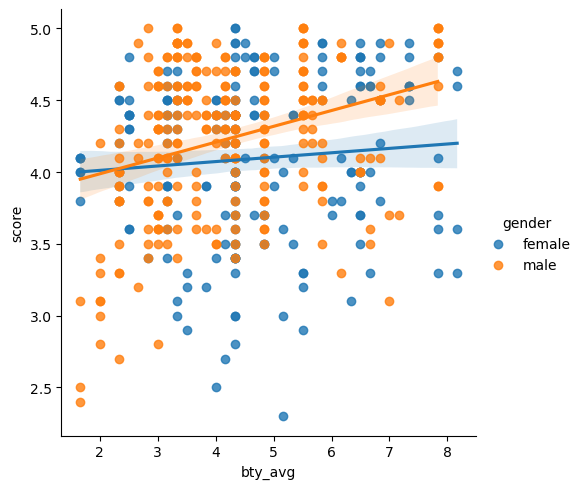

In [41]:
plot = sns.lmplot(data=data, x="bty_avg", y="score", hue="gender")